**Coursebook: Regression Model**

- Part 6 of Data Visualization and Machine Learning for PT Sinar Mas Mining
- Course Length: 9 hours
- Last Updated: December 2022

___

- Developed by [Algoritma](https://algorit.ma)'s product division and instructors team

# Background

The coursebook is part of the **Data Science in Python Specialization** prepared by Algoritma. The coursebook is intended for a restricted audience only, i.e. the individuals and organizations having received this coursebook directly from the training organization. It may not be reproduced, distributed, translated or adapted in any form outside these individuals and organizations without permission.

Algoritma is a data science education center based in Jakarta. We organize workshops and training programs to help working professionals and students gain mastery in various data science sub-fields: data visualization, machine learning, data modeling, statistical inference etc.

## Training Objectives

We will start by learning about what is machine learning in general and learn about your first regression model. This coursebook is intended for participants who have completed the preceding courses offered in the **Data Science in Python Specialization**. This is the sixth course, **Regression Model**. 

In this coursebook we will cover:

- **Linear Model**  

    - Least Square Regression  
    - Simple Linear Regression  
    - Leverage and Influence  
    - Linear Model Prediction  
    
- **Model Interpretation**

    - Model Interpretation  
    - Arriving at $\beta$ coefficient  
    - R-squared  
    
- **Multivariate Regression**  

    - Feature Selection  
    - Model Diagnostics  
    - Limitation of Regression Model

Before going into our main topic for this coursebook, let's import the packages we are going to use:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# suppress scientific notation
np.set_printoptions(suppress=True) # numpy output
pd.set_option('display.float_format', lambda x: '%.3f' % x) # pandas output

# suppress warning
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Introduction to Machine Learning

Machine learning on a very basic level, refers to a sub-field of computer science that “gives computer the ability to learn without being explicitly programmed”. Less-sensationally, it is concerned with the theory and application of statistical and mathematical methods to arrive at a particular objective without following a set of strictly defined and rigid pre-determined rules.

The most common machine learning is divided into two types, namely **supervised learning** and **unsupervised learning**. The difference between the two is that when we talk about **supervised learning** then we talk about predictions of a value because in supervised learning the data we will analyze has a variable target.

When the prediction value is numerical (think oil prices, rainfall, quarterly sales, blood pressure etc), it is generally referred to as a “regression” problem. This is in contrast with “classification” problems, a general term for when the value we’re trying to predict is categorical (loan defaults, email spam collection, handwriting recognition etc).

Whereas if we talk about **unsupervised learning** then we talk about data exploration because the data we want to process doesn't have a variable target. The method usually used to analyze a data using unsupervised learning is clustering or data grouping.


# Regression Model

First of all we want to learn about machine learning is about regression model. So let’s try and achieve some intuition about this important concept through the following illustration. I’m going to ahead and load some data and create a histogram from the resulting data.

It is important here to remind you that regression models are not just used in the machine learning context for numeric prediction. Regression, in fact, represent the “workhorse of data science” and is among the most practical and theoretically understood models in statistics. Data scientists well trained with this foundation will be able “to solve an incredible array of problems”. Because regression models often lead to highly interpretable models, we can (and should) consider them as a handy statistical tool that has its place in some of the most common data science tasks:

- **Prediction**: Predict the profitability of a new product category given its pilot launch sales figure
- **Statistical Modeling**: Determining a quantitative relationship between price sensitivity and average sales unit
- **Covariation**: Determining the (residual) variation in average sales unit that appears unrelated to price levels; and to investigate the impact of other external factors beyond price points in explaining the fluctuation of average sales unit

## Least Squares Regression

One of the terms you’ll hear a lot in this course is **least squares**. So let’s try and achieve some intuition about this important concept through the following illustration. I’m going to ahead and load some data and create a histogram from the resulting data.

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

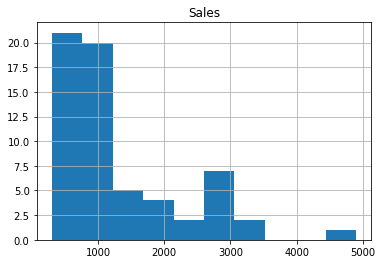

In [2]:
copiers = pd.read_csv("data_input/copiers.csv")
copiers.hist(column=['Sales'])

While the sales variable take on a rather large value (with an outlier at $5000), the idea of a least squares estimate is to identify a point in our data that minimizes the sum of the squared distances between the observed data and itself. We’ll observe later that, with no predictor variables, this least squares estimate is the sample average.

Because our estimation model isn’t going to predict every observation perfectly, minimizing the average (which is equivalent to: the sum) of squared errors seem like a reasonable thing to do. If we had minimize the average absolute deviation between the data, it would lead us to the median as the least squares estimate instead of the mean. While this may seem intuitive to some, I am counting on some of you to be skeptical enough as to question me on whether the sample average would in fact lead us to the least squares estimate.

Let’s explain the importance of least squares in the context of regression models. Before I create a scatterplot of the sales data, I’d remove the far outlier (the one close to $5000) from our sample data and treat it as noise. Do note that removing outlying data (or in the general treatment of outliers) is not a decision to be taken lightly and generally involve a more methodical and lengthier treatment with respect to its implications. If done poorly, you may even be guilty of “doctoring” the data to fit your pre-determined narrative.

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

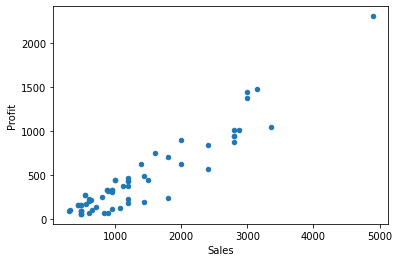

In [3]:
copiers.plot.scatter(x='Sales', y='Profit')

In this case, without diverting too far from the subject matter of this workshop, I think you can agree that the decision is well-justified. Another useful way to think about this particular decision in this case is to consider the following trade-off:

> Do we want the presence of a numerically distant observation (potentially < ~1% of total observations) at the expense of “poorer model fit” for the rest (99%) of the observation?

To refresh your memory, recall from your Practical Statistics class that the box plot identify an observation as an outlier if it’s positioned above or below either of its “whiskers”. That, we learned is 1.5 times the interquartile range above the upper quartile and bellow the lower quartile. Let’s draw a box plot of our variable of interest:

<AxesSubplot:>

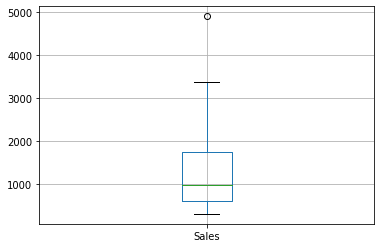

In [4]:
copiers.boxplot(column = ['Sales'])

Eliminating the outlier data from our original sample, we can now plot Sales against Profit and attain the following graph:

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

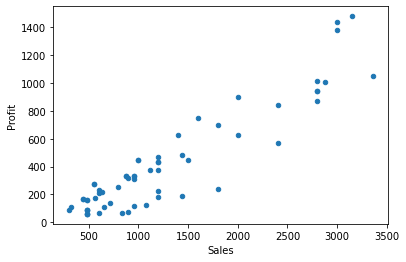

In [5]:
copiers = copiers[copiers.Sales <= 3500]
copiers.plot.scatter(x='Sales', y='Profit')

In [6]:
copiers[['Profit', 'Sales']].corr()

Profit  Sales
Profit   1.000  0.923
Sales    0.923  1.000

We can see a fairly linear relationship between the Sales and Profit variables of our `copiers` dataset, and the objective of a simple linear regression is concerned with modeling that relationship with a straight line.

## Simple Linear Regression

Create a linear model in Python is as convenient as you’d wish it to be. We will call the `OLS()` function from `statsmodels` library and specify two parameters: "Y" or the response/target variable, and "X" for the predictors:

In [7]:
import statsmodels.api as sm

Y = copiers['Profit']
X = sm.add_constant(copiers['Sales']) 

# fit the model
lm = sm.OLS(Y, X).fit()
lm.params

const   -83.548
Sales     0.394
dtype: float64

*__Note__: *Without sm.add_constant, `statsmodels` algorithms assume that $β_0 = 0$ in $\hat Y=β_0+β_1X_1$, and it'll fit the model using $β_0 = 0$ instead of calculating what β_0 is supposed to be based on your data. Please go through the next explanation for further explanation about the formula*

The `lm.params` return the coefficients of our linear model. But, now that we have the coefficients, what does that tell us? The size of the coefficients tell us the effect that variable has on our target variable. We observed here that Sales have a coefficient of **0.3944** on Profit, and because **0.3944** is a positive number we know that the effect is positive: the higher the Sales, the higher the Profit. A negative coefficient will indicate the opposite, and an example of that would be Profit vs Market Saturation: the increasingly saturated market leads to decreasing profit.

Can you think of another example where we might observe a negative coefficient in a regression model?

In addition to the above information, we’ve also derived the profit equation from our linear model directly. It takes the form:

$\hat Y=β_0+β_1X_1$

Which in plain English means: Estimated Profit = Intercept + Slope * Sales

Substituting the beta coefficients into the formula hence yield: Estimated Profit = -83.548 + 0.3944 * Sales

That tells us that the profit is expected to increase by $0.3944$ when the sales price of our Copiers machine increase by $1$, and decrease by $0.3944$ as the sales price of our Copiers machine decrease by $1$. For a Copiers machine with a listed price of $0$, the profit is predicted to be negative (incurring a loss of approximately $-83.548$).

Supposed we’re expecting a sales transaction by the end of day amount $1,000$. What would our linear model predict its profit to be?

In [8]:
-83.5481 + 0.3944 *1000

310.8519

It turns out that our linear model, `lm` would predict a profit of $310.8519$. Not too bad! However, `statsmodels` has functions such as `*.predict()` that allow us to obtain predictions given some input data. predict expects a machine learning model as its first parameter, and in this case a data frame to predict on:

In [9]:
c=[1, 1000]
lm.predict(c)

array([310.88770567])

In [10]:
lm.predict(X)

#equivalent with:
lm.fittedvalues

0     295.104
1     626.425
2     389.765
3    1099.740
4     389.765
       ...   
56    626.425
57    295.104
59    271.437
60    105.772
61   1020.856
Length: 61, dtype: float64

And with that let’s create our plot again, but this time we’ll also add a line from the result of our linear model prediction:

Text(0.5, 1.0, 'Sales vs. Profit')

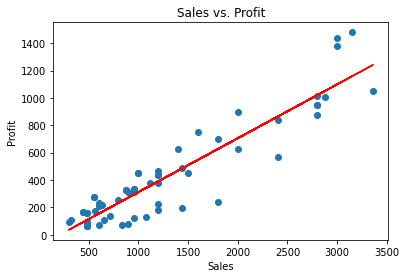

In [11]:
plt.scatter(copiers['Sales'],  copiers['Profit'])
plt.plot(copiers['Sales'], lm.fittedvalues, c='r')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs. Profit')

That line, it turns out, is the line of best fit for our observations. This fitted line is estimated with error because the points are not perfectly predicted by the line (even though they hover around the line), and our linear model `lm` have estimated this line to minimize the **least squares error**.

Because of how common the `(actual-estimation)**2).sum()` calculation is, we gave it a name: **sum of squared errors**, which is literal and memorable. OLS’s resid attribute allows us to compute the difference between the predicted and actual values:

In [12]:
((lm.resid)**2).sum()

1195955.9603188008

When I said “estimating a line”, I hope it occurs to you that we’re in fact estimating **two parameters**: the point at which our line cross the y-axis (known as the “intercept” term) and the slope degree (known as the “slope”). Collectively they’re also referred to as **coefficients** (or “beta coefficients”), but really you should know they mean the same thing. 

For most machine learning models we created in `statsmodels`, we can use functions such as `summary()` to obtain more information about the model. Let’s try and apply it on the model we just created:

In [13]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     338.0
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           4.22e-26
Time:                        20:04:40   Log-Likelihood:                -388.00
No. Observations:                  61   AIC:                             780.0
Df Residuals:                      59   BIC:                             784.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -83.5481     32.830     -2.545      0.014    -149.240     -17.856
Sales          0.3944      0.021     18.384      0.000       0.352       0.437
==============================================================================
Omnibus:                        1.946   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.378   Jarque-Bera (JB):                1.177
Skew:                          -0.199   Prob(JB):                        0.555
Kurtosis:                       3.552   Cond. No.                     2.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For now, let's focus on this area of the model `summary()` above :

![](assets/RM_t.png)

- From the output above, we see the two coefficients that represent our regression line in y-intercept (`const`) and slope (`Sales`).  The point at which our line crosses the y-intercept is -83.548 and the slope is 0.3944. The coefficient of the slope is estimated so as to minimize the vertical distance between the observed points (truth) and the prediction. 
- The standard error (`std err`) that was printed is an estimate of the standard deviation of the coefficient, which, recall, is an indication of how much our estimate varies across samples (due to random sampling). The lower it is, the higher is the level of accuracy of the coefficients.
- The t-value (`t`) we obtain from the summary is just the coefficient divided by the standard error:

In [14]:
-83.5481008/32.830

-2.544870569600975

- P-value (`P>|t|`) give us a probability of obtaining a t-value as extreme as what we just observed. P-value lower than 0.05 indicates that the predictor is statistically significant to the model.
- Confidence Interval (`[0.025   0.975]`) represents the range in which our coefficients are likely to fall (with a likelihood of 95%)

The reason why we’re concerned with these statistics is that in the regression modeling, we’re trying to investigate if there’s sufficient evidence that our independent variables (or “predictor variables”) are different from 0. That is to say, we like to know if variables like `Sales`, `Branch ID`, `Time of Day` have any real effect on the profitability of our Profit, or if variables such as humidity level, temperature, or duration of outdoor exposure has any real effect on machinery corrosion level.

Through a regression model, we want to see if these variables are genuinely affecting the target variable (“profit”) or that any apparent differences in profit are just due to random chance and sampling; The null hypothesis, recall, is that the reason we observe a difference in profitability across stores for example, is ultimately due to random chance from sampling - if we have sampled a different number of months, we would have observed a completely or even contradictory scenario! Recall from our practical statistics class that the rule of thumb to reject the null hypothesis (no effect) and favor the alternative hypothesis is 0.05. That is, if the chance of us observing a profit distribution such as these provided that they are in fact independent from store branches is only 5%, then we’d reject the null hypothesis.

*__Note__: If you need a refresher on the statistical concepts I’ve mentioned above, I encourage you to quickly glance over the Practical Statistics coursebook again and do some revision with your assigned academic mentor. If you’d like an in-depth treatment of the subject, I can recommend the free PDF copy of [The Elements of Statistical Learning: Data Mining, Inference, and Prediction](https://web.stanford.edu/~hastie/ElemStatLearn/download.html)*

## R-Squared

Now let's take a look again to the `summary()` of our model:

In [15]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     338.0
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           4.22e-26
Time:                        20:04:40   Log-Likelihood:                -388.00
No. Observations:                  61   AIC:                             780.0
Df Residuals:                      59   BIC:                             784.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -83.5481     32.830     -2.545      0.014    -149.240     -17.856
Sales          0.3944      0.021     18.384      0.000       0.352       0.437
==============================================================================
Omnibus:                        1.946   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.378   Jarque-Bera (JB):                1.177
Skew:                          -0.199   Prob(JB):                        0.555
Kurtosis:                       3.552   Cond. No.                     2.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Notice on the upper right, you'll see it return the information of the model's **R-squared**. R squared by definition is the percentage of the total variability that is explained by the linear relationship with the predictor (Regression Variation / Total Variation):

$R^2=1- \frac {∑ \limits_{i=1}^n (Y_i−\hat Y)^2}{∑ \limits_{i=1}^n(Y_i−\bar Y)^2}$

In other words, R squared can be thought of as a quantity that represents the % of the total variation that’s represented by the model. We simply take the regression variation and divide it by the total variation. In our case, it is the % of the variation in profit that is explained by the regression relationship with sales. Some facts about $R^2$:
- $R^2$ is the percentage of variation explained by the regression model
- 0 ≤ $R^2$ ≤ 1
- If we define R as the sample correlation between the predictor and the outcome, $R^2$ is simply the sample correlation squared

Because R-squared is a statistical measure of how close the data are to the fitted line, we want our model to achieve a high R-squared as it means our model has fit the data well (not always the case, but we’ll get to that later). You can also retrieve the information of the model R-squared by accessing the `rsquared` attribute:

In [16]:
lm.rsquared

0.8513778092396493

## Leverage  vs. Influence

Recall earlier that we left out the outlying data point; To illustrate the idea of leverage and power we’ll override the `copiers` dataset with the original data read from our csv again.

<AxesSubplot:>

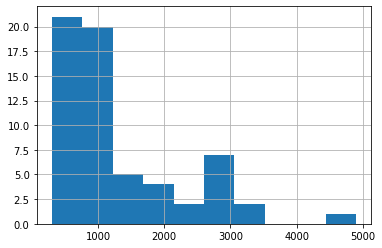

In [17]:
copiers = pd.read_csv('data_input/copiers.csv')
copiers['Sales'].hist()

Now let’s create a linear model named `lm_outlier` and plot the regression line:

const   -114.063
Sales      0.423
dtype: float64


Text(0.5, 1.0, 'Sales vs. Profit')

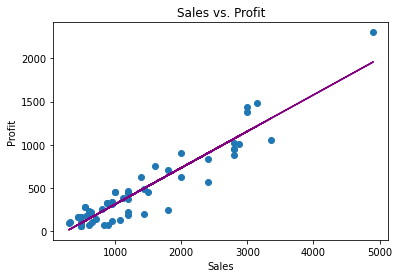

In [18]:
# define X and Y
X = sm.add_constant(copiers['Sales'])
Y = copiers['Profit']

# fit the model
lm_outliers = sm.OLS(Y, X).fit()
print(lm_outliers.params)

plt.scatter(copiers['Sales'], copiers['Profit'])
plt.plot(copiers['Sales'], lm_outliers.fittedvalues, c='purple')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs. Profit')

Notice the presence of that outlier have influenced our regression line but not by a degree that makes it immediately apparent (at least visually). Let’s inspect the impact our outlier data point has had on our model by printing the coefficients  and rsquared of this model with our outlier-exempted model:

In [19]:
print(lm_outliers.params)
print(lm_outliers.rsquared)

print(lm.params)
print(lm.rsquared)

const   -114.063
Sales      0.423
dtype: float64
0.8828077388598752
const   -83.548
Sales     0.394
dtype: float64
0.8513778092396493


Our outlier there is said to have **high leverage** if it’s predictor value (x-axis) is far away from the mean of the predictor values for all observations. In other words, if a point is far away from where the rest of the data, we say that the point has high leverage. This point has the potential to greatly influence the coefficients of our regression model, but we have yet to establish whether it did. Supposed that the point with high leverage is positioned in a way that largely fits the pattern observed in the rest of the data, then it is not particularly influential.

However, another outlier point that share the same leverage (its x-value is equally distant from the mean of the other observations) may substantially decreased the R-squared, and we can observe from the coefficients that the inclusion of this outlier has strong influence on our coefficients.

As a data scientist, it is important we learn to recognize when our regression models are unduly influenced by rare but influential data points - the inclusion of one or more influential outliers could strongly bias our regression model and render our analysis null.

# Multiple Linear Regression

Earlier on, we predict a future value of y given one input, x. Recall the y in our first example is the Profit and our x is the number of Sales. 

Also recall that because the number of profit depend on the number of sales, this y we’re working with is often referred to as dependent variable while the x are referred to as, you guessed it, independent variables. Can a regression model contain more than one dependent variable? Absolutely!

Imagine you’re hired as an intern to a city council that is planning for a few awareness-based hill races around the different hills and forests in West Java. The first question they’re interested in: Given the `distance` and `elevation` of each future race, are you able to predict the race time (in minutes) for each of these hill races?

Turns out regression models are perfect for these kind of problems. Applying what we’ve learnt above to this new question, the first thing obviously is to collect some data and run a linear model function on it. While we don’t have a record of past hill races in West Java, we will use a similar dataset called `hills` which is just a record of 35 Scottish hill races. The exercise while theoretical in nature, demonstrates yet another common application of regression models.

The hills dataset is [shipped with the `statsmodels` library](https://www.statsmodels.org/dev/datasets/index.html) so let’s load the data into our workspace and inspect the first 5 rows of the data:

In [20]:
import statsmodels.api as sm

In [ ]:
hills = sm.datasets.get_rdataset(dataname='hills', package='MASS').data
hills.head()

In [29]:
hills.to_csv('data_input/hills_regression.csv')

In [33]:
hills2 = pd.read_csv("data_input/hills.csv", index_col=0)
hills2.head()

dist  climb  time
Greenmantle  2.400    650 0.268
Carnethy     6.000   2500 0.806
Craig Dunain 6.000    900 0.561
Ben Rha      7.500    800 0.760
Ben Lomond   8.000   3070 1.038

Observe that for each race, the dataset has collected the following attributes:  

- `dist`: Distance in miles
- `climb`: Total height gained during the route, in feet
- `time`: Record time in minutes

Supposed we like to predict the required time to complete a race given the specified route distance and elevation in a race, we can regress `time` on `dist` and `climb`.:

In [25]:
Y = hills['time']
X = sm.add_constant(hills[['dist', 'climb']])

lm_race = sm.OLS(Y, X).fit()
lm_race.params

const   -8.992
dist     6.218
climb    0.011
dtype: float64

Looking at the multivariate model above, consider a regression where Distance and Climb enter linearly, our estimation could be written in the following:
Time = b1 + b2 x Distance + b3 x Climb

Supposed the race organizers inform us the next race is 9.65km (6 miles) in distance and has a total elevation of 701 meters (2300 foot), you’d substitute the values and have them multiplied by the coefficients:

Time = -8.99 + 6.218 x Distance + 0.01105 x Climb  
Time = -8.99 + 6.218 x 6 + 0.01105 x 2300  
Time = 53.733

In [26]:
-8.99 + 6.218 * 6 + 0.01105 * 2300

53.733000000000004

In [27]:
lm_race.predict([1, 6, 2300])

array([53.72588919])

We interpret b3 = 0.01105 minutes per foot as the slope of record time against Climb, allowing for the contribution of Distance. In this example 1 unit is not a useful amount of change in Climb. We would do better to restate b3 as 11.05 minutes per 1000 feet.

So, turns out the next race is Sentul Hill Color Run and with the given information from our appointed race organizers: 9.65km (6 miles) and total height gained of 701 meters (2300 foot) during the route we can use a least squares regression to predict the record race time.

## Extra Explanation for `crime` dataset

Let’s build another regression model to solidify our understanding of regression models. In the following code we take a peek at a dataset used by criminologists to study the effect of punishment regimes on crime rates. We’ll read the dataset and rename the columns:

In [28]:
crime = pd.read_csv("data_input/crime.csv", index_col=0)

crime.columns = ['percent_m', 'is_south', 'mean_education', 
                 'police_exp60', 'police_exp59', 'labour_participation',
                 'm_per1000f', 'state_pop', 'nonwhites_per1000', 'unemploy_m24',
                 'unemploy_m39', 'gdp', 'inequality', 'prob_prison', 'time_prison',  
                 'crime_rate']

crime.head()

percent_m  is_south  mean_education  police_exp60  police_exp59  \
1        151         1              91            58            56   
2        143         0             113           103            95   
3        142         1              89            45            44   
4        136         0             121           149           141   
5        141         0             121           109           101   

   labour_participation  m_per1000f  state_pop  nonwhites_per1000  \
1                   510         950         33                301   
2                   583        1012         13                102   
3                   533         969         18                219   
4                   577         994        157                 80   
5                   591         985         18                 30   

   unemploy_m24  unemploy_m39  gdp  inequality  prob_prison  time_prison  \
1           108            41  394         261        0.085       26.201   
2            96            36  557         194        0.030       25.300   
3            94            33  318         250        0.083       24.301   
4           102            39  673         167        0.016       29.901   
5            91            20  578         174        0.041       21.300   

   crime_rate  
1         791  
2        1635  
3         578  
4        1969  
5        1234

The dataset was collected in 1960 and a full description of the dataset wasn’t conveniently available. I use the description I gathered from the authors of the MASS package. After you rename the dataset (in your coursebook, around line 410 to line 420), the variables are:
- `percent_m`: percentage of males aged 14-24 - is_south: whether it is in a Southern state. 1 for Yes, 0 for No.
- `mean_education`: mean years of schooling
- `police_exp60`: police expenditure in 1960
- `police_exp59`: police expenditure in 1959 - labour_participation: labour force participation rate
- `m_per1000f`: number of males per 1000 females
- `state_pop`: state population
- `nonwhites_per1000`: number of non-whites resident per 1000 people
- `unemploy_m24`: unemployment rate of urban males aged 14-24
- `unemploy_m39`: unemployment rate of urban males aged 35-39
- `gdp`: gross domestic product per head
- `inequality`: income inequality
- `prob_prison`: probability of imprisonment
- `time_prison`: avg time served in prisons
- `crime_rate`: crime rate in an unspecified category 

**Discussion**:

1. Try to predict `crime_rate` based on `gdp` and `mean_education`. Observe the coefficients with `model.params`, how would you interpret each coefficient of the model?

In [29]:
## Your code here



## Adjusted R-Squared

Using R-squared itself can be misleading in our assessment of the model fit and this is due to the one of the key limitation of this metric. R-squared, it turns out increases with every new addition of a predictor variable, even if it turns out that the variable is just completely random number - the R-squared does not decrease. As a result, a model with more independent variables may appear to have a better fit just on the merit of having more terms alone.

A model that has too many predictors also tend to overfit and worse, the regression model would “model” the random noise in our data as if they were “features”, hence producing misleading R-squared values.

The adjusted R-squared compares the explanatory power of regression models built with different number of predictors, allowing us to compare a crime rate regression model with 4 variables to another one with just 2 variables and find out if the one with 4 has achieved a higher R-squared simply because it has more predictors or if they truly lead to a better fit.

Compare the following 3 models and pay attention to both it’s R-squared and Adjusted R-squared values:

In [30]:
Y = crime['inequality']

# model 1
X_model1 = sm.add_constant(crime['gdp'])
model1 = sm.OLS(Y, X_model1).fit()

# model 2
X_model2 = sm.add_constant(crime[['gdp','mean_education']])
model2 = sm.OLS(Y, X_model2).fit()

# model 3
X_model3 = sm.add_constant(crime[['gdp','labour_participation','m_per1000f','time_prison']])
model3 = sm.OLS(Y, X_model3).fit()

# compare result
pd.DataFrame({
    'model': ['model1', 'model2', 'model3'],
    'r-squared': [model1.rsquared, model2.rsquared, model3.rsquared],
    'adj. r-squared': [model1.rsquared_adj, model2.rsquared_adj, model3.rsquared_adj]
})

model  r-squared  adj. r-squared
0  model1      0.781           0.777
1  model2      0.812           0.803
2  model3      0.794           0.774

`model1` has one predictor variable and has an R-squared of 0.7815 (adjusted R-squared of 0.7766). We see that by adding three additional predictors (`labor_participation`, `m_per1000f`, `time_prison`) the R-squared of our model increased to 0.7939 (`model3`). Now we say that R-squared indicates the quality of model fit, so does this necessarily means that model3 is a better model than model1? Not really. In fact, by adding three additional parameters, our Adjusted R-Squared has decreased and returned a model that has a lower Adjusted R-squared than the two other models (despite built with more predictor variables).

So as a recap, our R-squared value tells us how well our model describes the data. It measures the extent to which the variance in our dependent variable (inequality) can be explained by the independent variables (gdp etc). However, as we increase the number of independent variables our model's R-squared value will also increase as it is incorporate any legitimate information as well as the noise introduced by these extra variables.

Adjusted R-squared on the other hand does not increases the way R-squared does because it is adjusted for the number of predictor variables in our model. It increases only when the new variable actually leads to a better prediction. While the mathematical details of the adjusted R-squared formula is beyond the scope of this workshop, I'll give you a quick proof that it does "penalizes" the r-squared based on the number of predictors the model contains.

The mathematical notation of adjusted R-squared:
$R^2_{adj} = 1-(1-R^2)\frac{n-1}{n-p-1}$

Where _n_ is the number of observations and _p_ is the number of predictors. Notice that as _p_ increases, the second term becomes larger and pushing the overall adjusted R-squared value down. If it isn't obvious, I included the following code so you can play around by changing the number of predictors (we used 4 in the model):

In [31]:
no_of_preds = 4
adjusted_model3 = 1 - (1-model3.rsquared)  * (crime.shape[0]-1) / (crime.shape[0]-1-no_of_preds)

adjusted_model3

0.7742470048366594

# Regression Model Evaluation

In some cases, you might end up with more than one model for you to choose. It is often important for us to evaluate the performance of each model to find out which of the models result in the least total error. On the next chapters of machine learning specialization, we will dwell into an in-depth discussion on various evaluation metrics. A rather common measure we'll introduce in this chapter is Root Mean Squared Error. It measures the root mean square of observed data points to its predicted values. The mathematical notation of RMSE:

$RMSE = \sqrt{\frac{\sum_i^{n}(Predicted_i-Actual_i)^2}{n}}$



`statsmodels` has the `rmse` function that can be used to calculate the RMSE value:

In [32]:
# # recall target & predictor:
# Y = crime['inequality']
# X_model1 = sm.add_constant(crime['gdp'])
# X_model2 = sm.add_constant(crime[['gdp','mean_education']])
# X_model3 = sm.add_constant(crime[['gdp','labour_participation','m_per1000f','time_prison']])

In [33]:
from statsmodels.tools.eval_measures import rmse

# predict data with different models
y_model1 = model1.predict(X_model1)
y_model2 = model2.predict(X_model2)
y_model3 = model3.predict(X_model3)

# compare the rmse
pd.DataFrame({'RMSE': [rmse(Y, y_model1), rmse(Y, y_model2), rmse(Y, y_model3)]},
             index= ['Model 1', 'Model 2', 'Model 3'])

RMSE
Model 1 18.452
Model 2 17.120
Model 3 17.919

#  Limitations of Regression Models

Linear regression models, even when considered to be the powerhouse of statistics came with its limitations and assumptions.

- Linear regressions are best fitted on data where a linear relationship between the predictor variables and target exist.   
- Simple / Multiple regression models can be sensitive to outliers (recall the chapter regarding leverage and power)  
- Simple / Multiple regression models assumes that the independent variables are not highly correlated with each other (hence using the police_exp to capture the information from both `police_exp60` and `police_exp59`)

In making predictions on the target variable using linear regression, **we must fulfill several assumptions as a condition that the regression model that we make is statistically appropriate**.
Some of the assumptions that must be fulfilled in linear regression models are:

1. Linear prediction variables for target variables
2. Normal residuals
3. Residuals have no heteroscedasticity
4. There is no multicollinearity


In fact,to check these assumptions, our model `summary()` [provides several measures](https://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html) to give you an idea of the distribution and behavior. Take a look at the bottom part of our model summary:

In [34]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             inequality   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     40.44
Date:                Sun, 23 Oct 2022   Prob (F-statistic):           6.98e-14
Time:                        21:01:56   Log-Likelihood:                -202.33
No. Observations:                  47   AIC:                             414.7
Df Residuals:                      42   BIC:                             423.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  305.0515    110.097      2.771      0.008      82.867     527.236
gdp                     -0.3671      0.030    -12.081      0.000      -0.428      -0.306
labour_participation    -0.0219      0.083     -0.262      0.795      -0.190       0.147
m_per1000f               0.0768      0.122      0.627      0.534      -0.170       0.324
time_prison              0.6976      0.440      1.584      0.121      -0.191       1.587
==============================================================================
Omnibus:                        2.326   Durbin-Watson:                   2.394
Prob(Omnibus):                  0.313   Jarque-Bera (JB):                2.197
Skew:                          -0.500   Prob(JB):                        0.333
Kurtosis:                       2.650   Cond. No.                     4.98e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Normality of Residuals

Recall that residuals is the difference between the observed data and the fitted values. The normality assumption means that the residuals from the linear regression model should be normally distributed because we expect to get residuals near the zero value. To check whether the residuals of our model is normal, there are multiple statistics test that can check for normality, among the common ones are Shapiro-Wilk test. 

In the test we use hypothesis testing if check our model has normal residual:
- $H_0$ : residuals model normal  
- $H_1$ : residuals model is not normal  

>Recall our practical statistics material, if we want to get our conclusion of model has normal of residual, we must get the p-value of test bigger than alpha (5%).

In [35]:
from scipy.stats import shapiro

name = {0: 'Statistics',1: 'p-value'}
pd.DataFrame({shapiro(model3.resid)}).rename(columns=name)

statistic  pvalue
0      0.968   0.230

Since we arrived at p-value of 0.23, bigger than our alpha, means that we failed to reject null hypothesis and our residual is indeed following a normal distribution. However, a certain notes from the official documentation we should take note of:

> For N > 5000 the W test statistic is accurate but the p-value may not be.

In this case, we must be aware of the limitation and use additional methods to verify our results such as visually inspecting data distribution.

### [Optional:] Interpret the Residual Normality Indicators from `sm` results

You can also use the model summary to inspect the normality of the residuals from the listed values:

- **Omnibus/Prob(Omnibus)** – a test of the skewness and kurtosis of the residual.A value close to 0 indicates normality. The Prob (Omnibus) performs a statistical test on the probability of the residuals are normally distributed.A value close to 1 indicates the probability that the residuals are normally distributed. 

- **Skew** – measures data symmetry. A value close to 0 indicates the residual distribution is normal

- **Jarque-Bera/Prob(JB)** – A value of 6 or higher indicates that errors are not normally distributed and the normality null hypothesis has been rejected at the 5% significance level. A value close to 0 indicates the data is normally distributed. 


In [36]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             inequality   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     40.44
Date:                Sun, 23 Oct 2022   Prob (F-statistic):           6.98e-14
Time:                        21:01:56   Log-Likelihood:                -202.33
No. Observations:                  47   AIC:                             414.7
Df Residuals:                      42   BIC:                             423.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  305.0515    110.097      2.771      0.008      82.867     527.236
gdp                     -0.3671      0.030    -12.081      0.000      -0.428      -0.306
labour_participation    -0.0219      0.083     -0.262      0.795      -0.190       0.147
m_per1000f               0.0768      0.122      0.627      0.534      -0.170       0.324
time_prison              0.6976      0.440      1.584      0.121      -0.191       1.587
==============================================================================
Omnibus:                        2.326   Durbin-Watson:                   2.394
Prob(Omnibus):                  0.313   Jarque-Bera (JB):                2.197
Skew:                          -0.500   Prob(JB):                        0.333
Kurtosis:                       2.650   Cond. No.                     4.98e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## No-Heteroscedasticity

Similar to normality residual test, the residual we have must be homogeneous which means the data is spread. If the residual data that we have spreads and does not form a pattern, the linear regression model that we have is sufficiently explain our data. 

A residual plot is a plot that plot the residual values on the y-axis and the fitted values on the x-axis. Once we’ve done that, we look for any unwanted patterns in the plot that may indicate a violation in model assumptions particularly relating to incorrect specifications.

A residual plot that has points randomly scattered around the x-axis is the one we want. It doesn’t mean that the model is perfect, but it does mean that the regression model you fit appropriately describes the variability in our dependent variable. If there is a pattern in the residual plot, it means that the model can be further improved upon or that it does not meet the linearity assumption:


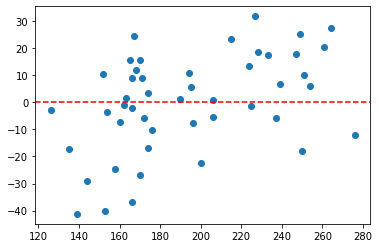

In [37]:
plt.scatter(x = crime['inequality'], y = model3.resid)
plt.axhline(y=0, color='r', linestyle='--')



To check our residuals doesn't have pattern, we can make a scatterplot between residual data and target variable or we can use Breuch-Pagan test.

In Breuch-Pagan test we have hypothesis that :

- $H_0$ : residuals model doesn't have pattern (homoskedasticity)
- $H_1$ : residuals model have pattern (heteroskedasticity)

> Recall our practical statistics material, if we want to get our conclusion of model has no heteroskedasticity, we must get the p-value of test bigger than alpha (5%)

We can use Breush-Pagan test from `het_breuschpagan()` function from `statsmodels`:

In [38]:
import statsmodels.stats.api as sms

name = {0: 'Lagrange multiplier statistic',
       1: 'p-value',
       2: 'f-value',
       3: 'f p-value'}

pd.DataFrame({
    sms.het_breuschpagan(model3.resid, model3.model.exog)
}).rename(columns= name)

Lagrange multiplier statistic  p-value  f-value  f p-value
0                          5.109    0.276    1.281      0.293

Since we arrived at p-value of 0.276, we failed to reject the null hypothesis. Meanwhile visually inspecting our residual plot we can also came into conclusion that there are no apparent pattern that we need to keep our eyes on.

## No Multicolinearity

In linear mathematical formulation, we assumed that there are no correlation between the variables in order to have a separate independent effect of each variables. One of the statistical tool you have at your disposal when assessing multicollinearity is the **Variance Inflation Factor** (VIF) statistic. Put simply, VIF is a way to measure the effect of multicollinearity among the predictors in our model.

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

x = crime[['gdp','labour_participation','m_per1000f','time_prison']]
xc = sm.add_constant(x)

vif = [vif(xc.values, i) for i in range(len(xc.columns))]
pd.Series(data=vif, index=xc.columns).sort_values(ascending=False)

const                  1585.459
m_per1000f                1.668
labour_participation      1.458
time_prison               1.247
gdp                       1.100
dtype: float64

The limitations of the different machine learning models are something we will revisit soon and again as we progress in the machine learning specialization. Not only will we learn how to identify them early - we’ll also learn various techniques to treat them, preventing overfitting / underfitting and making model diagnostic a critical part of your machine learning toolset.

## Sklearn Libraries

Sklearn is the most popular library in python for machine learning. While it's important to understand the statistic behind the linear regression and giving intepretation using `statsmodels` library. You can use your finised fomula to create machine learning model with `sklearn`. We will give you example how to use `sklearn` library to make machine learning model using crime dataset.

In [40]:
from sklearn import linear_model

In [41]:
crime.head()

percent_m  is_south  mean_education  police_exp60  police_exp59  \
1        151         1              91            58            56   
2        143         0             113           103            95   
3        142         1              89            45            44   
4        136         0             121           149           141   
5        141         0             121           109           101   

   labour_participation  m_per1000f  state_pop  nonwhites_per1000  \
1                   510         950         33                301   
2                   583        1012         13                102   
3                   533         969         18                219   
4                   577         994        157                 80   
5                   591         985         18                 30   

   unemploy_m24  unemploy_m39  gdp  inequality  prob_prison  time_prison  \
1           108            41  394         261        0.085       26.201   
2            96            36  557         194        0.030       25.300   
3            94            33  318         250        0.083       24.301   
4           102            39  673         167        0.016       29.901   
5            91            20  578         174        0.041       21.300   

   crime_rate  
1         791  
2        1635  
3         578  
4        1969  
5        1234

In this part we want to predict `inequality` by `gdp` and `mean_education`:

In [42]:
x_data = np.array(crime[['gdp', 'mean_education']]).reshape(-1,2)
y_data = crime.inequality

lm_ineq= linear_model.LinearRegression()
lm_ineq.fit(x_data, y_data)

LinearRegression()

Then we can check the rsquare using `.score()`

In [43]:
lm_ineq.score(x_data, y_data)

0.8118523135850517

Lastly we can predict using the model with `.predict()` function. 

In [44]:
pred = lm_ineq.predict(x_data)
pred[:5]

array([245.16930098, 178.16004778, 268.82815377, 137.50497535,
       164.78227418])